In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# universidad = 'UNIVERSIDAD DISTRITAL"FRANCISCO JOSE DE CALDAS"-BOGOTÁ D.C.'

In [59]:
UD_df = pd.read_csv("raw_data/ud.csv")
UD_df.columns

Index(['PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_TIPODOCUMENTO', 'ESTU_PAIS_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
       'ESTU_MCPIO_RESIDE', 'ESTU_CODDANE_COLE_TERMINO',
       'ESTU_COD_COLE_MCPIO_TERMINO', 'ESTU_COD_DEPTO_PRESENTACION',
       'INST_COD_INSTITUCION', 'INST_NOMBRE_INSTITUCION',
       'INST_CARACTER_ACADEMICO', 'ESTU_NUCLEO_PREGRADO',
       'ESTU_INST_DEPARTAMENTO', 'ESTU_INST_CODMUNICIPIO',
       'ESTU_INST_MUNICIPIO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_PRGM_CODMUNICIPIO', 'ESTU_PRGM_MUNICIPIO',
       'ESTU_NIVEL_PRGM_ACADEMICO', 'ESTU_METODO_PRGM',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_DEPTO_PRESENTACION',
       'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_MCPIO_PRESENTACION',
       'ESTU_PAGOMATRICULABECA', 'ESTU_PAGOMATRICULACREDITO',
       'ESTU_HORASSEMANATRABAJA', 'ESTU_SNIES_PRGMACADEMICO',
       'ESTU_PRIVADO_LIBERTAD', 'ESTU_NACIONALIDAD', 'ESTU_ESTUDIANTE',
       'ESTU_GENERO',

In [60]:
# extraer las columnas 
# ESTU_DEPTO_RESIDE -------------------- ¿Solo los de Bogotá? (No, todos los departamentos)
# ESTU_PRGM_ACADEMICO ------------------ ¿Dejo el programa académico? ---- (Solo ingenieria)
# ESTU_HORASSEMANATRABAJA -------------- ¿Cuanto tiempo trabaja a la semana? X
# ESTU_ESTUDIANTE ---------------------- ¿Es estudiante o es individual? ---- (eliminar los individuales)
# ESTU_GENERO -------------------------- ¿Genero? X
# ESTU_FECHANACIMIENTO ----------------- ¿Fecha de nacimiento? X
# ESTU_PAGOMATRICULAPROPIO ------------- ¿Paga usted mismo su matricula? x
# FAMI_EDUCACIONPADRE ------------------ ¿Nivel de estudio del padre? X
# FAMI_TIENEAUTOMOVIL ------------------ ¿Tiene automovil? X
# FAMI_TIENELAVADORA ------------------- ¿Tiene lavadora? X
# FAMI_ESTRATOVIVIENDA ----------------- ¿Estrato de la vivienda? X
# FAMI_TIENECOMPUTADOR ----------------- ¿Tiene computador? X
# FAMI_TIENEINTERNET ------------------- ¿Tiene internet? X
# FAMI_EDUCACIONMADRE ------------------ ¿Nivel de estudio de la madre? X
# MOD_RAZONA_CUANTITAT_PUNT ------------ ¿Puntaje Modulo Razonamiento Cuantitativo?
# MOD_COMUNI_ESCRITA_PUNT -------------- ¿Puntaje Modulo Comunicación Escrita?
# MOD_LECTURA_CRITICA_PUNT ------------- ¿Puntaje Modulo Lectura Crítica?
# MOD_INGLES_PUNT ---------------------- ¿Puntaje Modulo Inglés?
# MOD_COMPETEN_CIUDADA_PUNT ------------ ¿Puntaje Modulo Competencias Ciudadanas?
# (calcular edad y calcular y el rendimiento en la prueba)
# Todo en mayusculas
columns = ['PERIODO','ESTU_DEPTO_RESIDE', 'ESTU_PRGM_ACADEMICO', 'ESTU_HORASSEMANATRABAJA', 'ESTU_ESTUDIANTE', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENELAVADORA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONMADRE', 'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_COMUNI_ESCRITA_PUNT', 'MOD_LECTURA_CRITICA_PUNT', 'MOD_INGLES_PUNT', 'MOD_COMPETEN_CIUDADA_PUNT']
print(len(columns))
UD_df = UD_df[columns]





20


In [61]:
# conocer valores nulos, tipos de datos, en blanco, etc
UD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PERIODO                    10600 non-null  int64  
 1   ESTU_DEPTO_RESIDE          10587 non-null  object 
 2   ESTU_PRGM_ACADEMICO        10600 non-null  object 
 3   ESTU_HORASSEMANATRABAJA    9978 non-null   object 
 4   ESTU_ESTUDIANTE            10600 non-null  object 
 5   ESTU_GENERO                10596 non-null  object 
 6   ESTU_FECHANACIMIENTO       10600 non-null  object 
 7   ESTU_PAGOMATRICULAPROPIO   10548 non-null  object 
 8   FAMI_EDUCACIONPADRE        10132 non-null  object 
 9   FAMI_TIENEAUTOMOVIL        9901 non-null   object 
 10  FAMI_TIENELAVADORA         9946 non-null   object 
 11  FAMI_ESTRATOVIVIENDA       10017 non-null  object 
 12  FAMI_TIENECOMPUTADOR       9957 non-null   object 
 13  FAMI_TIENEINTERNET         10051 non-null  obj

In [62]:
# eliminar valores nulos
UD_df = UD_df.dropna()
UD_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9673 entries, 0 to 10599
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PERIODO                    9673 non-null   int64  
 1   ESTU_DEPTO_RESIDE          9673 non-null   object 
 2   ESTU_PRGM_ACADEMICO        9673 non-null   object 
 3   ESTU_HORASSEMANATRABAJA    9673 non-null   object 
 4   ESTU_ESTUDIANTE            9673 non-null   object 
 5   ESTU_GENERO                9673 non-null   object 
 6   ESTU_FECHANACIMIENTO       9673 non-null   object 
 7   ESTU_PAGOMATRICULAPROPIO   9673 non-null   object 
 8   FAMI_EDUCACIONPADRE        9673 non-null   object 
 9   FAMI_TIENEAUTOMOVIL        9673 non-null   object 
 10  FAMI_TIENELAVADORA         9673 non-null   object 
 11  FAMI_ESTRATOVIVIENDA       9673 non-null   object 
 12  FAMI_TIENECOMPUTADOR       9673 non-null   object 
 13  FAMI_TIENEINTERNET         9673 non-null   object 
 

In [63]:
# Obtener valores unicos por cada columna
for column in UD_df.columns:
    print(f"Columna: {column}")
    print(UD_df[column].unique())
    print("")

Columna: PERIODO
[20183 20195 20203 20212 20196 20225 20222]

Columna: ESTU_DEPTO_RESIDE
['BOGOTÁ' 'CUNDINAMARCA' 'CALDAS' 'NARIÑO' 'VALLE' 'META' 'BOYACA'
 'QUINDIO' 'TOLIMA' 'SANTANDER' 'CAUCA' 'HUILA' 'NORTE SANTANDER'
 'SAN ANDRES' 'CAQUETA' 'CASANARE' 'CORDOBA' 'LA GUAJIRA' 'RISARALDA'
 'ATLANTICO' 'ANTIOQUIA' 'AMAZONAS' 'GUAINIA' 'ARAUCA']

Columna: ESTU_PRGM_ACADEMICO
['INGENIERIA FORESTAL' 'INGENIERIA CATASTRAL Y GEODESIA'
 'INGENIERIA ELECTRICA' 'INGENIERIA EN TELEMATICA' 'INGENIERIA INDUSTRIAL'
 'INGENIERIA DE SISTEMAS' 'INGENIERIA ELECTRONICA' 'ARTES MUSICALES'
 'INGENIERIA EN CONTROL'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN CIENCIAS SOCIALES'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN INGLES'
 'INGENIERIA TOPOGRAFICA' 'INGENIERIA AMBIENTAL'
 'LICENCIATURA EN BIOLOGIA'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES Y LENGUA CASTELLANA'
 'ARTES ESCENICAS' 'INGENIERÍA SANITARIA' 'INGENIERIA DE PRODUCCION'
 'LICENCIATURA EN PEDAGOGIA INFANTIL' 'A

In [64]:
# Obtener el año de "PERIODO" que corresponde a los cuatro primeros digitos
UD_df['PERIODO'] = UD_df['PERIODO'].astype(str)
UD_df['PERIODO'] = UD_df['PERIODO'].str[:4]
UD_df['PERIODO'] = UD_df['PERIODO'].astype(int)

In [65]:
UD_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9673 entries, 0 to 10599
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PERIODO                    9673 non-null   int64  
 1   ESTU_DEPTO_RESIDE          9673 non-null   object 
 2   ESTU_PRGM_ACADEMICO        9673 non-null   object 
 3   ESTU_HORASSEMANATRABAJA    9673 non-null   object 
 4   ESTU_ESTUDIANTE            9673 non-null   object 
 5   ESTU_GENERO                9673 non-null   object 
 6   ESTU_FECHANACIMIENTO       9673 non-null   object 
 7   ESTU_PAGOMATRICULAPROPIO   9673 non-null   object 
 8   FAMI_EDUCACIONPADRE        9673 non-null   object 
 9   FAMI_TIENEAUTOMOVIL        9673 non-null   object 
 10  FAMI_TIENELAVADORA         9673 non-null   object 
 11  FAMI_ESTRATOVIVIENDA       9673 non-null   object 
 12  FAMI_TIENECOMPUTADOR       9673 non-null   object 
 13  FAMI_TIENEINTERNET         9673 non-null   object 
 

In [66]:
# Date format = 28/01/1996 (calculate age) using "Periodo" column
UD_df['AUX'] = pd.to_datetime(UD_df['ESTU_FECHANACIMIENTO'], format='%d/%m/%Y', errors='coerce')
UD_df['AGE'] = UD_df['PERIODO'] - UD_df['AUX'].dt.year
UD_df['AGE'].unique()

array([ 22.,  23.,  21.,  33.,  27.,  26.,  25.,  31.,  24.,  32.,  37.,
        35.,  30.,  29.,  28.,  38.,  44.,  20.,  42.,  40.,  34.,  41.,
        39.,  36.,  52.,  43.,  47.,  50.,  54.,  45.,  55.,  48.,   0.,
        51.,  57.,  19.,  46., 118.,  nan,  59.,  56.,  49.])

In [67]:
# Eliminar valores nulos y las edades que son 0 o 118
UD_df = UD_df.dropna()
UD_df = UD_df[UD_df['AGE'] != 0]
UD_df = UD_df[UD_df['AGE'] != 118]

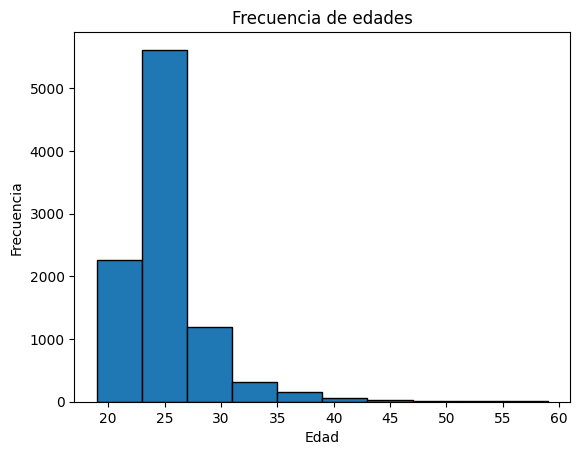

In [68]:
# Grafica de frecuencia de las edades
plt.hist(UD_df['AGE'], bins=10, edgecolor='black')
plt.title('Frecuencia de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()



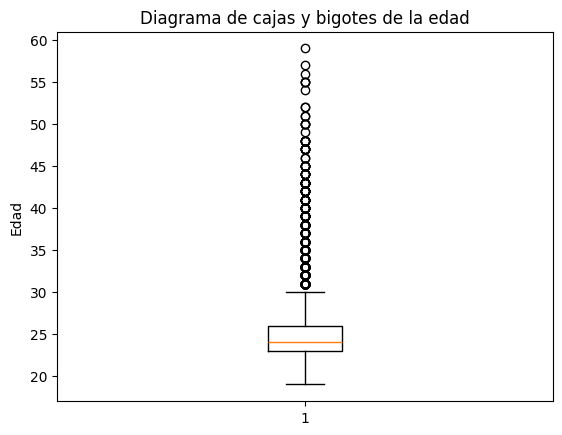

In [69]:
# Diagrama de  cajas y bigotes de la edad
plt.boxplot(UD_df['AGE'])
plt.title('Diagrama de cajas y bigotes de la edad')
plt.ylabel('Edad')
plt.show()

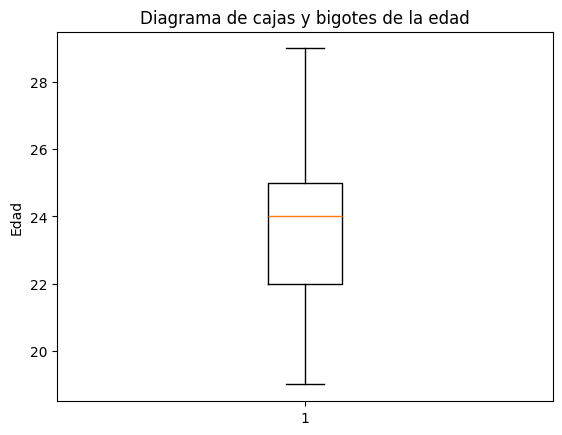

In [70]:
# Eliminación de outlayers en la edad (edad > 30
UD_df = UD_df[UD_df['AGE'] < 30]
plt.boxplot(UD_df['AGE'])
plt.title('Diagrama de cajas y bigotes de la edad')
plt.ylabel('Edad')
plt.show()

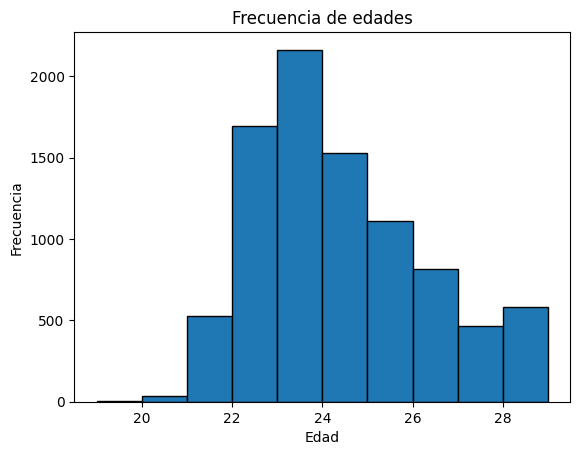

In [71]:
# Grafica de frecuencia de las edades
plt.hist(UD_df['AGE'], bins=10, edgecolor='black')
plt.title('Frecuencia de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [72]:
UD_df.drop(columns=['AUX','ESTU_ESTUDIANTE','ESTU_FECHANACIMIENTO'], inplace=True)

In [73]:
for column in UD_df.columns:
    print(f"Columna: {column}")
    print(UD_df[column].unique())
    print("")

Columna: PERIODO
[2018 2019 2020 2021 2022]

Columna: ESTU_DEPTO_RESIDE
['BOGOTÁ' 'CUNDINAMARCA' 'CALDAS' 'NARIÑO' 'VALLE' 'META' 'BOYACA'
 'QUINDIO' 'TOLIMA' 'SANTANDER' 'CAUCA' 'HUILA' 'NORTE SANTANDER'
 'SAN ANDRES' 'CAQUETA' 'CORDOBA' 'LA GUAJIRA' 'ANTIOQUIA' 'AMAZONAS'
 'CASANARE' 'GUAINIA' 'RISARALDA']

Columna: ESTU_PRGM_ACADEMICO
['INGENIERIA FORESTAL' 'INGENIERIA CATASTRAL Y GEODESIA'
 'INGENIERIA ELECTRICA' 'INGENIERIA INDUSTRIAL' 'INGENIERIA DE SISTEMAS'
 'INGENIERIA ELECTRONICA' 'ARTES MUSICALES'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN CIENCIAS SOCIALES'
 'INGENIERIA EN CONTROL'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN INGLES'
 'INGENIERIA TOPOGRAFICA' 'INGENIERIA AMBIENTAL'
 'LICENCIATURA EN BIOLOGIA'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES Y LENGUA CASTELLANA'
 'INGENIERÍA SANITARIA' 'INGENIERIA DE PRODUCCION'
 'LICENCIATURA EN PEDAGOGIA INFANTIL' 'ADMINISTRACION DEPORTIVA'
 'ADMINISTRACION AMBIENTAL' 'ARTES PLASTICAS Y VISUALES'
 

(array([  39.,  150.,  520., 1604., 2778., 2717., 1045.,   38.,    0.,
          31.]),
 array([ 67. ,  90.3, 113.6, 136.9, 160.2, 183.5, 206.8, 230.1, 253.4,
        276.7, 300. ]),
 <BarContainer object of 10 artists>)

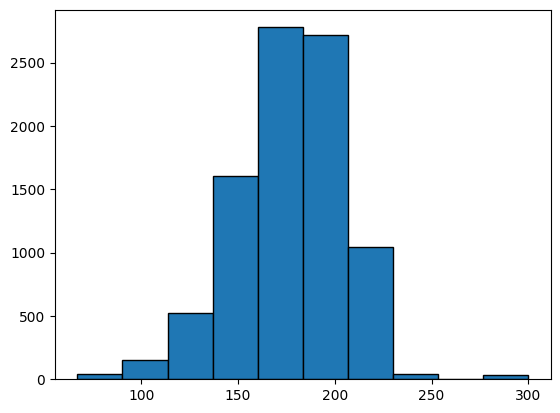

In [74]:
# Construir histoggrama del MOD_RAZONA_CUANTITAT_PUNT
plt.hist(UD_df['MOD_RAZONA_CUANTITAT_PUNT'], bins=10, edgecolor='black')

In [75]:
# Obtener todos los que tienen alguna competencia igual a 0
Zeros = UD_df[(UD_df['MOD_RAZONA_CUANTITAT_PUNT'] == 0) | (UD_df['MOD_COMUNI_ESCRITA_PUNT'] == 0) | (UD_df['MOD_LECTURA_CRITICA_PUNT'] == 0) | (UD_df['MOD_INGLES_PUNT'] == 0) | (UD_df['MOD_COMPETEN_CIUDADA_PUNT'] == 0)]
print(Zeros)

       PERIODO ESTU_DEPTO_RESIDE  \
69        2020            BOGOTÁ   
145       2019            BOGOTÁ   
148       2019            BOGOTÁ   
291       2020            BOGOTÁ   
471       2019      CUNDINAMARCA   
...        ...               ...   
10580     2022      CUNDINAMARCA   
10581     2022            BOGOTÁ   
10582     2022            BOGOTÁ   
10586     2022      CUNDINAMARCA   
10594     2022            BOGOTÁ   

                                     ESTU_PRGM_ACADEMICO  \
69                                 INGENIERIA INDUSTRIAL   
145    LICENCIATURA EN EDUCACION BASICA CON ENFASIS E...   
148                      INGENIERIA CATASTRAL Y GEODESIA   
291    LICENCIATURA EN EDUCACION BASICA CON ENFASIS E...   
471                             ADMINISTRACION DEPORTIVA   
...                                                  ...   
10580                 LICENCIATURA EN PEDAGOGIA INFANTIL   
10581                                        MATEMATICAS   
10582                 LICEN

In [76]:
# Calcular puntuación global como el rendimiento de todos los componentes
UD_df['PUNT_GLOBAL'] = UD_df['MOD_RAZONA_CUANTITAT_PUNT'] + UD_df['MOD_COMUNI_ESCRITA_PUNT'] + UD_df['MOD_LECTURA_CRITICA_PUNT'] + UD_df['MOD_INGLES_PUNT'] + UD_df['MOD_COMPETEN_CIUDADA_PUNT']
UD_df['PUNT_GLOBAL'] = UD_df['PUNT_GLOBAL']/5
print(UD_df['PUNT_GLOBAL'])

0        196.8
1        166.8
2        153.0
4        180.0
5        185.8
         ...  
10595    159.6
10596    183.2
10597    161.6
10598    152.6
10599    165.6
Name: PUNT_GLOBAL, Length: 8922, dtype: float64


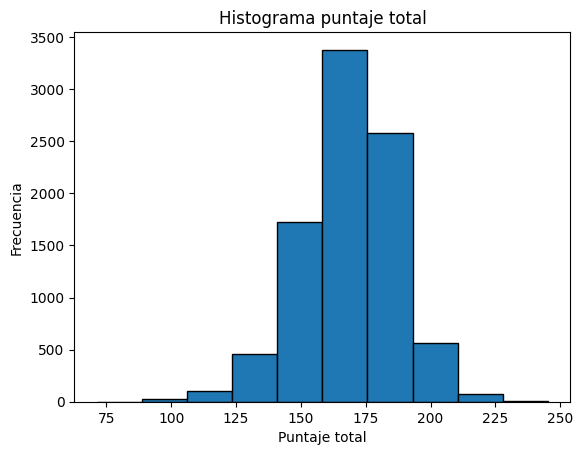

In [77]:
# Histograma puntaje total
plt.hist(UD_df['PUNT_GLOBAL'], bins=10, edgecolor='black')
plt.title('Histograma puntaje total')
plt.xlabel('Puntaje total')
plt.ylabel('Frecuencia')
plt.show()

In [78]:
# Genera una columna "RENDIMIENTO" el cual es muy bajo, bajo, medio, alto, excelente para el puntaje global menor a 60, entre 60 y 120, entre 120 y 180, entre 180 y 240, mayor a 240
UD_df['RENDIMIENTO'] = pd.cut(UD_df['PUNT_GLOBAL'], bins=[0,60,120,180,240,300], labels=['Muy bajo','Bajo','Medio','Alto','Excelente'])
print(UD_df['RENDIMIENTO'])

0         Alto
1        Medio
2        Medio
4        Medio
5         Alto
         ...  
10595    Medio
10596     Alto
10597    Medio
10598    Medio
10599    Medio
Name: RENDIMIENTO, Length: 8922, dtype: category
Categories (5, object): ['Muy bajo' < 'Bajo' < 'Medio' < 'Alto' < 'Excelente']


In [79]:
UD_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8922 entries, 0 to 10599
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   PERIODO                    8922 non-null   int64   
 1   ESTU_DEPTO_RESIDE          8922 non-null   object  
 2   ESTU_PRGM_ACADEMICO        8922 non-null   object  
 3   ESTU_HORASSEMANATRABAJA    8922 non-null   object  
 4   ESTU_GENERO                8922 non-null   object  
 5   ESTU_PAGOMATRICULAPROPIO   8922 non-null   object  
 6   FAMI_EDUCACIONPADRE        8922 non-null   object  
 7   FAMI_TIENEAUTOMOVIL        8922 non-null   object  
 8   FAMI_TIENELAVADORA         8922 non-null   object  
 9   FAMI_ESTRATOVIVIENDA       8922 non-null   object  
 10  FAMI_TIENECOMPUTADOR       8922 non-null   object  
 11  FAMI_TIENEINTERNET         8922 non-null   object  
 12  FAMI_EDUCACIONMADRE        8922 non-null   object  
 13  MOD_RAZONA_CUANTITAT_PUNT  8922 non-n

In [80]:
# save df to "clean_ud"
UD_df.to_csv("raw_data/clean_ud.csv", index=False)